### Problem Statement:
The Credit Card Fraud Detection issue associated with finding the pattern of past credit card transactions that turned out to be fradulant. This predicted behavior is used to identify whether a new transaction being processed is fraud or not. 

### Observations
•	There are very few fraudulent transactions (less than 1%). The data is highly skewed, consisting of 492 frauds in a total of 284,807 observations, which is only 0.172% fraud cases.

•	The dataset consists of numerical values from the 28 PCA transformed features (V1 to V28). Morover, there is no metadata about the original features provided.

•	No missing value present in the dataset.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [20]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Exploratory Data Analysis

In [22]:
#pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [23]:
df.shape

(284807, 31)

In [24]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C:\Users\Jainish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


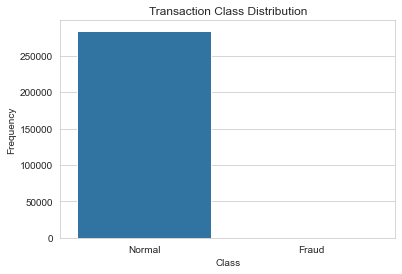

In [25]:
LABELS = ["Normal", "Fraud"]

sns.countplot(df.Class)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

Note: This is how imbalanced dataset we have! Most of the transactions are non-fraud and predictive model trained over dataframe might get a lot of errors and our algorithms will probably overfit since the majority transactions are non-fraud.

In [26]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

#### How different money distribution was in different transaction groups?

In [27]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


C:\Users\Jainish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jainish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


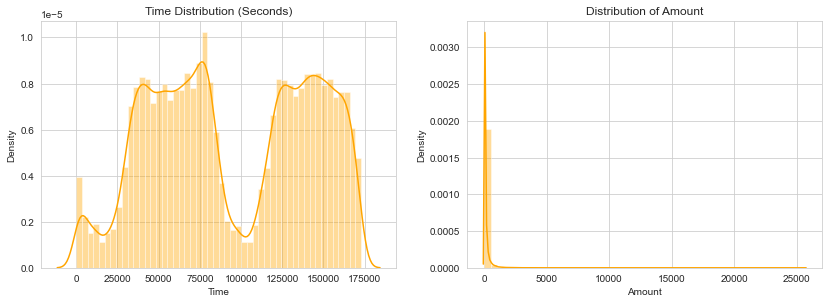

In [28]:
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')
sns.distplot(df['Time'], color='orange');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(df['Amount'],color='orange');

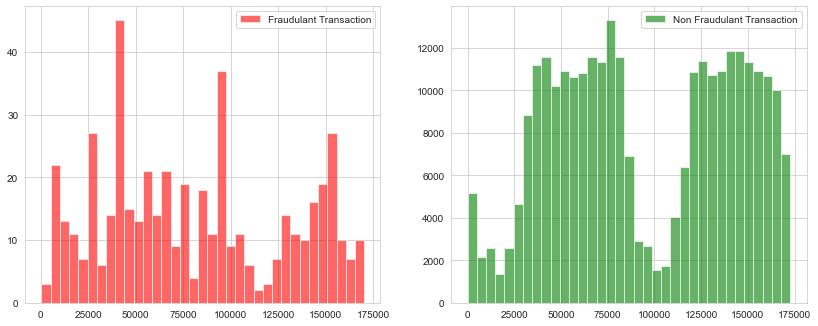

In [29]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
df[df.Class == 1].Time.hist(bins=35, color='red', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
df[df.Class == 0].Time.hist(bins=35, color='green', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

Doesn't seem like the time of transaction really matters here as per above observation. Now let us take a sample of the dataset for out modelling and prediction

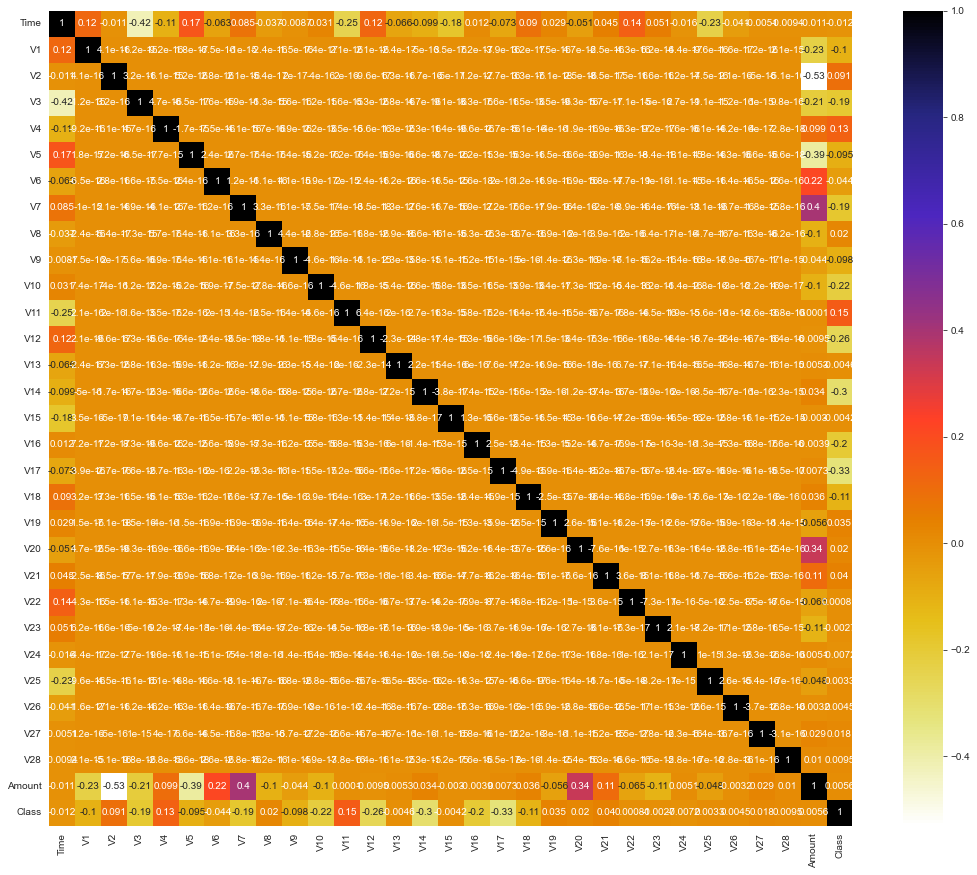

In [30]:
cor = df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show() 

The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other.

## Data Pre-processing

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = df.drop('Class', axis=1)
y = df.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, test_size=0.2, random_state=42)


In [32]:
X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [33]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'-'*70}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'-'*70}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
----------------------------------------------------------------------
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
----------------------------------------------------------------------
TESTING: X_test: (85443, 30), y_test: (85443,)


## Model Building

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

## XGBoost

In [37]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_test_pred = xgb_clf.predict(X_test)

print_score(y_test, y_test_pred, train=False)

scores_dict = {
    'XGBoost': {
        'Test': f1_score(y_test, y_test_pred),
    },
}

C:\Users\Jainish\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.948718  0.999637      0.974212      0.999626
recall         0.999930    0.816176  0.999637      0.908053      0.999637
f1-score       0.999818    0.877470  0.999637      0.938644      0.999624
support    85307.000000  136.000000  0.999637  85443.000000  85443.000000
_______________________________________________
Confusion Matrix: 
 [[85301     6]
 [   25   111]]



## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_test_pred = rf_clf.predict(X_test)

print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Test': f1_score(y_test, y_test_pred),
}

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999695    0.901639  0.999555      0.950667      0.999539
recall         0.999859    0.808824  0.999555      0.904341      0.999555
f1-score       0.999777    0.852713  0.999555      0.926245      0.999543
support    85307.000000  136.000000  0.999555  85443.000000  85443.000000
_______________________________________________
Confusion Matrix: 
 [[85295    12]
 [   26   110]]



## CatBoost

In [41]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)

Learning rate set to 0.089847
0:	learn: 0.3914637	total: 249ms	remaining: 4m 8s
1:	learn: 0.2368418	total: 313ms	remaining: 2m 35s
2:	learn: 0.1341780	total: 366ms	remaining: 2m 1s
3:	learn: 0.0788514	total: 414ms	remaining: 1m 43s
4:	learn: 0.0482949	total: 467ms	remaining: 1m 32s
5:	learn: 0.0315326	total: 524ms	remaining: 1m 26s
6:	learn: 0.0213628	total: 579ms	remaining: 1m 22s
7:	learn: 0.0153604	total: 629ms	remaining: 1m 17s
8:	learn: 0.0115137	total: 681ms	remaining: 1m 14s
9:	learn: 0.0090128	total: 732ms	remaining: 1m 12s
10:	learn: 0.0071550	total: 786ms	remaining: 1m 10s
11:	learn: 0.0060638	total: 836ms	remaining: 1m 8s
12:	learn: 0.0052453	total: 886ms	remaining: 1m 7s
13:	learn: 0.0046542	total: 942ms	remaining: 1m 6s
14:	learn: 0.0042229	total: 1s	remaining: 1m 5s
15:	learn: 0.0038780	total: 1.06s	remaining: 1m 5s
16:	learn: 0.0036112	total: 1.12s	remaining: 1m 4s
17:	learn: 0.0034152	total: 1.17s	remaining: 1m 3s
18:	learn: 0.0032511	total: 1.21s	remaining: 1m 2s
19:	l

161:	learn: 0.0012291	total: 8.74s	remaining: 45.2s
162:	learn: 0.0012280	total: 8.79s	remaining: 45.2s
163:	learn: 0.0012266	total: 8.85s	remaining: 45.1s
164:	learn: 0.0012199	total: 8.92s	remaining: 45.1s
165:	learn: 0.0012135	total: 8.97s	remaining: 45.1s
166:	learn: 0.0012109	total: 9.04s	remaining: 45.1s
167:	learn: 0.0012013	total: 9.09s	remaining: 45s
168:	learn: 0.0011997	total: 9.14s	remaining: 44.9s
169:	learn: 0.0011975	total: 9.19s	remaining: 44.9s
170:	learn: 0.0011950	total: 9.25s	remaining: 44.8s
171:	learn: 0.0011937	total: 9.29s	remaining: 44.7s
172:	learn: 0.0011858	total: 9.35s	remaining: 44.7s
173:	learn: 0.0011818	total: 9.39s	remaining: 44.6s
174:	learn: 0.0011801	total: 9.43s	remaining: 44.5s
175:	learn: 0.0011772	total: 9.49s	remaining: 44.5s
176:	learn: 0.0011728	total: 9.55s	remaining: 44.4s
177:	learn: 0.0011700	total: 9.59s	remaining: 44.3s
178:	learn: 0.0011608	total: 9.64s	remaining: 44.2s
179:	learn: 0.0011524	total: 9.69s	remaining: 44.1s
180:	learn: 0.

320:	learn: 0.0007630	total: 17.9s	remaining: 37.8s
321:	learn: 0.0007616	total: 17.9s	remaining: 37.8s
322:	learn: 0.0007583	total: 18s	remaining: 37.7s
323:	learn: 0.0007535	total: 18.1s	remaining: 37.7s
324:	learn: 0.0007525	total: 18.1s	remaining: 37.6s
325:	learn: 0.0007492	total: 18.2s	remaining: 37.6s
326:	learn: 0.0007479	total: 18.2s	remaining: 37.5s
327:	learn: 0.0007457	total: 18.3s	remaining: 37.5s
328:	learn: 0.0007442	total: 18.4s	remaining: 37.4s
329:	learn: 0.0007434	total: 18.4s	remaining: 37.4s
330:	learn: 0.0007414	total: 18.4s	remaining: 37.3s
331:	learn: 0.0007400	total: 18.5s	remaining: 37.2s
332:	learn: 0.0007381	total: 18.6s	remaining: 37.2s
333:	learn: 0.0007363	total: 18.6s	remaining: 37.1s
334:	learn: 0.0007345	total: 18.7s	remaining: 37s
335:	learn: 0.0007334	total: 18.7s	remaining: 37s
336:	learn: 0.0007317	total: 18.8s	remaining: 36.9s
337:	learn: 0.0007300	total: 18.8s	remaining: 36.8s
338:	learn: 0.0007283	total: 18.9s	remaining: 36.8s
339:	learn: 0.0007

483:	learn: 0.0004459	total: 26.1s	remaining: 27.8s
484:	learn: 0.0004454	total: 26.1s	remaining: 27.8s
485:	learn: 0.0004421	total: 26.2s	remaining: 27.7s
486:	learn: 0.0004407	total: 26.2s	remaining: 27.6s
487:	learn: 0.0004385	total: 26.3s	remaining: 27.6s
488:	learn: 0.0004378	total: 26.3s	remaining: 27.5s
489:	learn: 0.0004375	total: 26.4s	remaining: 27.5s
490:	learn: 0.0004369	total: 26.4s	remaining: 27.4s
491:	learn: 0.0004359	total: 26.5s	remaining: 27.3s
492:	learn: 0.0004352	total: 26.5s	remaining: 27.3s
493:	learn: 0.0004333	total: 26.6s	remaining: 27.2s
494:	learn: 0.0004322	total: 26.6s	remaining: 27.2s
495:	learn: 0.0004305	total: 26.7s	remaining: 27.1s
496:	learn: 0.0004299	total: 26.7s	remaining: 27.1s
497:	learn: 0.0004268	total: 26.8s	remaining: 27s
498:	learn: 0.0004259	total: 26.8s	remaining: 26.9s
499:	learn: 0.0004204	total: 26.9s	remaining: 26.9s
500:	learn: 0.0004202	total: 27s	remaining: 26.8s
501:	learn: 0.0004199	total: 27s	remaining: 26.8s
502:	learn: 0.0004

643:	learn: 0.0002744	total: 35s	remaining: 19.4s
644:	learn: 0.0002731	total: 35.1s	remaining: 19.3s
645:	learn: 0.0002730	total: 35.1s	remaining: 19.3s
646:	learn: 0.0002720	total: 35.2s	remaining: 19.2s
647:	learn: 0.0002718	total: 35.2s	remaining: 19.1s
648:	learn: 0.0002705	total: 35.3s	remaining: 19.1s
649:	learn: 0.0002695	total: 35.3s	remaining: 19s
650:	learn: 0.0002694	total: 35.4s	remaining: 19s
651:	learn: 0.0002688	total: 35.4s	remaining: 18.9s
652:	learn: 0.0002658	total: 35.5s	remaining: 18.8s
653:	learn: 0.0002655	total: 35.5s	remaining: 18.8s
654:	learn: 0.0002652	total: 35.6s	remaining: 18.7s
655:	learn: 0.0002649	total: 35.6s	remaining: 18.7s
656:	learn: 0.0002645	total: 35.7s	remaining: 18.6s
657:	learn: 0.0002644	total: 35.7s	remaining: 18.6s
658:	learn: 0.0002642	total: 35.7s	remaining: 18.5s
659:	learn: 0.0002634	total: 35.8s	remaining: 18.4s
660:	learn: 0.0002630	total: 35.8s	remaining: 18.4s
661:	learn: 0.0002627	total: 35.9s	remaining: 18.3s
662:	learn: 0.0002

805:	learn: 0.0001751	total: 43.8s	remaining: 10.5s
806:	learn: 0.0001746	total: 43.9s	remaining: 10.5s
807:	learn: 0.0001745	total: 43.9s	remaining: 10.4s
808:	learn: 0.0001744	total: 44s	remaining: 10.4s
809:	learn: 0.0001744	total: 44s	remaining: 10.3s
810:	learn: 0.0001743	total: 44.1s	remaining: 10.3s
811:	learn: 0.0001742	total: 44.1s	remaining: 10.2s
812:	learn: 0.0001736	total: 44.2s	remaining: 10.2s
813:	learn: 0.0001731	total: 44.2s	remaining: 10.1s
814:	learn: 0.0001726	total: 44.3s	remaining: 10.1s
815:	learn: 0.0001724	total: 44.4s	remaining: 10s
816:	learn: 0.0001722	total: 44.4s	remaining: 9.95s
817:	learn: 0.0001721	total: 44.5s	remaining: 9.9s
818:	learn: 0.0001714	total: 44.5s	remaining: 9.84s
819:	learn: 0.0001714	total: 44.6s	remaining: 9.79s
820:	learn: 0.0001710	total: 44.6s	remaining: 9.73s
821:	learn: 0.0001708	total: 44.7s	remaining: 9.68s
822:	learn: 0.0001707	total: 44.8s	remaining: 9.63s
823:	learn: 0.0001705	total: 44.8s	remaining: 9.57s
824:	learn: 0.00017

964:	learn: 0.0001314	total: 52.3s	remaining: 1.9s
965:	learn: 0.0001313	total: 52.4s	remaining: 1.84s
966:	learn: 0.0001312	total: 52.4s	remaining: 1.79s
967:	learn: 0.0001310	total: 52.4s	remaining: 1.73s
968:	learn: 0.0001310	total: 52.5s	remaining: 1.68s
969:	learn: 0.0001306	total: 52.5s	remaining: 1.63s
970:	learn: 0.0001297	total: 52.6s	remaining: 1.57s
971:	learn: 0.0001296	total: 52.6s	remaining: 1.52s
972:	learn: 0.0001295	total: 52.7s	remaining: 1.46s
973:	learn: 0.0001295	total: 52.8s	remaining: 1.41s
974:	learn: 0.0001293	total: 52.8s	remaining: 1.35s
975:	learn: 0.0001290	total: 52.9s	remaining: 1.3s
976:	learn: 0.0001284	total: 52.9s	remaining: 1.25s
977:	learn: 0.0001283	total: 53s	remaining: 1.19s
978:	learn: 0.0001282	total: 53s	remaining: 1.14s
979:	learn: 0.0001278	total: 53.1s	remaining: 1.08s
980:	learn: 0.0001276	total: 53.1s	remaining: 1.03s
981:	learn: 0.0001273	total: 53.2s	remaining: 975ms
982:	learn: 0.0001271	total: 53.2s	remaining: 920ms
983:	learn: 0.0001

In [42]:
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    159204.0  287.0       1.0   159491.0      159491.0
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.932773  0.999614      0.966240      0.999600
recall         0.999906    0.816176  0.999614      0.908041      0.999614
f1-score       0.999807    0.870588  0.999614      0.935197      0.999601
support    85307.000000  136.000000  0.999614  85443.000000  85443.000000


<AxesSubplot:>

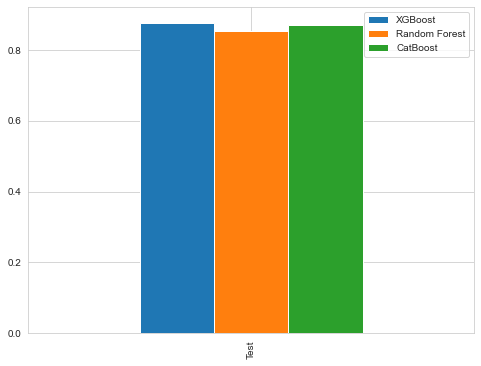

In [47]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='bar', figsize=(8, 6))